# My First Convolutional Neural Network : Fashion MNIST
---
#### 실습목표
1. CNN의 기본 아이디어를 안다.
2. CNN의 구조를 그리고, 코드로 옮길 수 있다.

## Real Game : CNN on Fashion MNIST

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [1]:
'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

### Data Loading

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
labels = ["T-shirt/top",  # index 0
            "Trouser",      # index 1
            "Pullover",     # index 2
            "Dress",        # index 3
            "Coat",         # index 4
            "Sandal",       # index 5
            "Shirt",        # index 6
            "Sneaker",      # index 7
            "Bag",          # index 8
            "Ankle boot"]   # index 9

print(labels)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


id = 5662
다음 그림은 Sneaker 입니다.


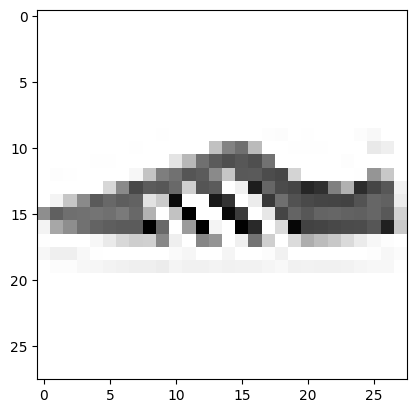

In [5]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')

plt.imshow(test_x[id], cmap='Greys')
plt.show()

### X : Min-Max Scaling

- 최소값 0, 최대값 1로 통일하는 스케일링

In [6]:
max_n, min_n = train_x.max(), train_x.min()

In [7]:
train_x = (train_x - min_n) / (max_n - min_n)
test_x = (test_x - min_n) / (max_n - min_n)

In [8]:
print(f'max : {train_x.max()}, min : {train_x.min()}')

max : 1.0, min : 0.0


### X : Reshape(# of data, 28, 28, 1)

- **끝에 1을 달아서 그레이스케일(흑백)을 명시해준다.**

In [9]:
_, h, w = train_x.shape
h, w

(28, 28)

In [10]:
train_x = train_x.reshape(train_x.shape[0], h, w, 1)
test_x = test_x.reshape(test_x.shape[0], h, w, 1)
train_x.shape, test_x.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### Y : One-Hot Encoding

In [11]:
class_n = len(np.unique(train_y))
class_n

10

In [12]:
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)
train_y.shape, test_y.shape

((60000, 10), (10000, 10))

### 코드를 완성해주세요!

- Sequential API, Functional API 중 택일
- **자유롭게 먼저 해보는 것을 추천**
---
- **구조를 따라서 코딩을 한다면..**

    1. 인풋 레이어
    2. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    3. BatchNormalization
    4. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    5. BatchNormalization
    6. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    7. DropOut : 25% 비활성화
    8. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    9. BatchNormalization
    10. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    11. BatchNormalization
    12. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    13. DropOut : 25% 비활성화
    14. Flatten
    15. Fully Connected Layer : 노드 512개
    16. BatchNormalization
    17. 아웃풋 레이어

In [13]:
X = tf.keras.layers.Input(shape=[28,28,1])
H = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2)(H)
H = tf.keras.layers.Dropout(0.25)(H)

H = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2)(H)
H = tf.keras.layers.Dropout(0.25)(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(512, activation='relu')(H)
H = tf.keras.layers.BatchNormalization()(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X,Y)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0     

### Early Stopping을 활용한 학습

- 조건
    1. validation_split = 0.2
    2. EarlyStopping. val_loss가 5 epoch 전과 비교하여 개선되지 않으면 스탑
    4. 이미지 시각화를 위해 hist 변수에 학습 과정을 넣어주세요.

In [14]:
es = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
hist = model.fit(train_x, train_y, epochs=1000, validation_split=0.2, callbacks=[es])

Epoch 1/1000
1500/1500 [==============================] - 30s 8ms/step - loss: 0.4158 - accuracy: 0.8526 - val_loss: 0.3260 - val_accuracy: 0.8862
Epoch 2/1000
1500/1500 [==============================] - 11s 8ms/step - loss: 0.2831 - accuracy: 0.8987 - val_loss: 0.2976 - val_accuracy: 0.8903
Epoch 3/1000
1500/1500 [==============================] - 11s 8ms/step - loss: 0.2467 - accuracy: 0.9095 - val_loss: 0.2442 - val_accuracy: 0.9082
Epoch 4/1000
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2195 - accuracy: 0.9201 - val_loss: 0.2281 - val_accuracy: 0.9169
Epoch 5/1000
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1992 - accuracy: 0.9263 - val_loss: 0.2119 - val_accuracy: 0.9255
Epoch 6/1000
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1783 - accuracy: 0.9350 - val_loss: 0.2339 - val_accuracy: 0.9144
Epoch 7/1000
1500/1500 [==============================] - 11s 8ms/step - loss: 0.1646 - accuracy: 0.9387 - val_loss: 

### 이미지 시각화

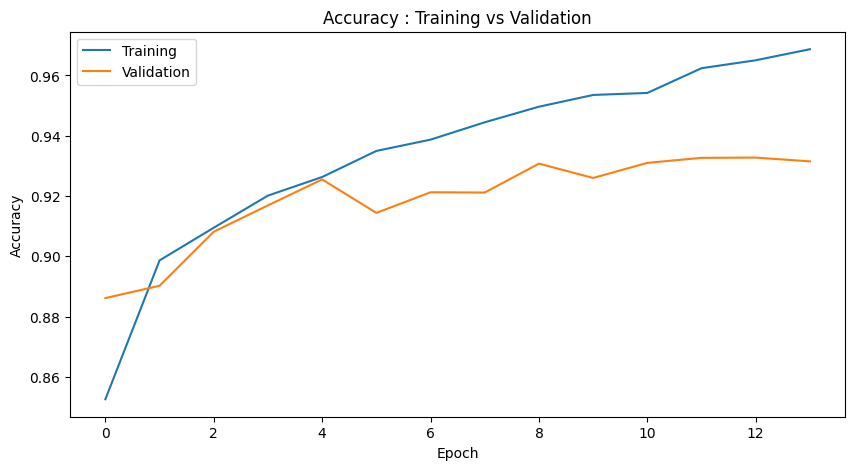

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

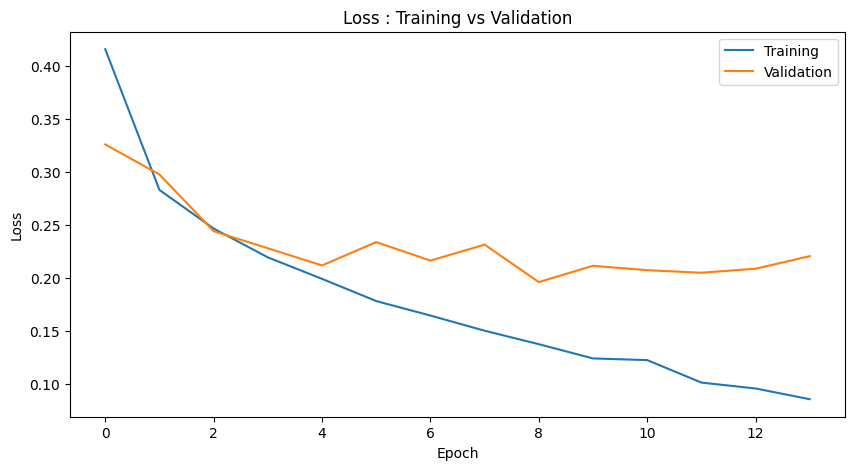

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [17]:
y_pred = model.predict(test_x)
y_pred.shape

313/313 [==============================] - 1s 3ms/step


(10000, 10)

In [18]:
y_pred[:3]

array([[2.1328479e-07, 2.3676003e-07, 8.5452548e-08, 9.8189581e-08,
        9.3724609e-08, 1.6804156e-04, 1.8763899e-06, 1.0193732e-04,
        6.7752703e-10, 9.9972743e-01],
       [1.7424460e-04, 2.6218222e-06, 9.9963355e-01, 4.2922620e-05,
        9.4087321e-05, 5.4323395e-06, 4.5000543e-05, 1.2141006e-06,
        3.2589966e-07, 6.3244272e-07],
       [9.7984558e-11, 1.0000000e+00, 7.0948887e-09, 2.3812816e-09,
        1.0969230e-10, 1.8792404e-10, 9.8007225e-10, 7.8305085e-11,
        4.1887177e-10, 4.7642820e-13]], dtype=float32)

In [20]:
single_y_pred = y_pred.argmax(axis=1)
single_y_pred.shape

(10000,)

In [21]:
single_y_pred[:3]

array([9, 2, 1])

In [ ]:
print(test_y.shape)
single_test_y = test_y.argmax(axis=1)
print(single_test_y.shape)

(10000, 10)
(10000,)


In [ ]:
test_acc = accuracy_score(single_test_y, single_y_pred)

print(f'테스트셋 정확도 : {test_acc*100:.2f}%' )

테스트셋 정확도 : 92.29%


id = 3333
다음 그림은 숫자 3 입니다.
모델의 예측 : 3
모델의 카테고리별 확률 : [ 0.  0.  0. 99.  0.  0.  0.  0.  0.  0.]
정답입니다


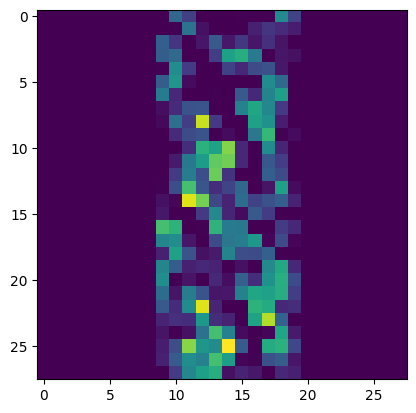

In [ ]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 숫자 {single_test_y[id]} 입니다.')
print(f'모델의 예측 : {single_y_pred[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(y_pred[id]*100)}')

if single_test_y[id] == single_y_pred[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([28,-1]))
plt.show()

id = 3554
다음 그림은 숫자 2 입니다.
모델의 예측 : 4
모델의 카테고리별 확률 : [ 0.  0.  5. 37. 53.  0.  3.  0.  0.  0.]
틀렸어요


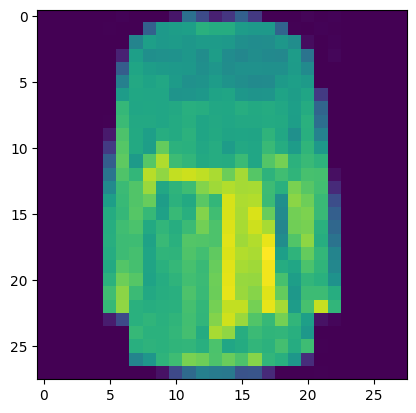

In [ ]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (single_test_y==single_y_pred)
f_id = np.where(true_false==False)[0]        # 틀린 것들의 인덱스 반환
f_n = len(f_id)                              # 틀린 것들이 총 몇 개나 될까?

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}')
print(f'다음 그림은 숫자 {single_test_y[id]} 입니다.')
print(f'모델의 예측 : {single_y_pred[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(y_pred[id]*100)}')

if single_test_y[id] == single_y_pred[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([28,-1]))
plt.show()

In [ ]:
from itertools import permutations
num = [1,1,1,2,2]
#num.remove(2)
data=list(permutations(num, 5))
unique_data = list(set(data))
unique_data

[(1, 2, 2, 1, 1),
 (1, 1, 2, 2, 1),
 (2, 1, 1, 1, 2),
 (1, 2, 1, 2, 1),
 (2, 1, 2, 1, 1),
 (1, 2, 1, 1, 2),
 (2, 2, 1, 1, 1),
 (1, 1, 2, 1, 2),
 (1, 1, 1, 2, 2),
 (2, 1, 1, 2, 1)]

In [ ]:
from itertools import combinations
num = [1,1,1,2,2]
#num.remove(2)
data=list(combinations(num, 5))
unique_data = list(set(data))
unique_data

[(1, 1, 1, 2, 2)]